<a href="https://colab.research.google.com/github/RahimMirani/Bidirectional-LSTM-for-NLP/blob/main/Bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
dataset = tfds.load('imdb_reviews', as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

batch_size = 16

train_dataset = train_dataset.shuffle(10000).batch(batch_size)
test_dataset = test_dataset.batch(batch_size)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.N9DXUR_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.N9DXUR_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.N9DXUR_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
example, label = next(iter(train_dataset))
print('Text:\n', example.numpy()[0])
print('\nLabel: ', label.numpy()[0])


Text:
 b"Eleven different Film Makers from different parts of the world are assembled in this film to present their views and ideas about the WTC attack. This is one of the best effort you will see in any Film. Films like this are rarely made and appreciated. This film tries to touch every possible core of WTC. Here are some of the most important stories from the film that makes this film so unique.<br /><br />There is the story from Samira Makhmalbaf (Iran) where somewhere in Iran people are preparing for the attacks from America. There a teacher is trying to educate her students by informing them about Innocent People being killed in WTC massacre. Then comes a story from Youssef Chahine (Egypt) where a Film Maker comes across face-to-face conversation with a Dead Soldier in the WTC attack and a Dead Hard Core Terrorist who was involved in WTC attack. Then we see a story from Idrissa Ouedraogo (Burkina Faso) where a group of Five Innocent children's sees Osama Bin Laden and plans to k

In [ ]:
vectorize_layer = tf.keras.layers.TextVectorization(output_mode='int', output_sequence_length=100)

vectorize_layer.adapt(train_dataset.map(lambda x, y: x))


In [ ]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(len(vectorize_layer.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.summary()

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ text_vectorization                   │ ?                           │     0 (unbuilt) │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_dataset,
    epochs=5,
    validation_data=test_dataset,
)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 537s 336ms/step - accuracy: 0.6450 - loss: 0.5993 - val_accuracy: 0.7886 - val_loss: 0.4744
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 537s 343ms/step - accuracy: 0.8691 - loss: 0.3151 - val_accuracy: 0.8078 - val_loss: 0.4648
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 553s 338ms/step - accuracy: 0.9500 - loss: 0.1365 - val_accuracy: 0.7852 - val_loss: 0.5967
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 562s 337ms/step - accuracy: 0.9796 - loss: 0.0614 - val_accuracy: 0.7824 - val_loss: 0.8310
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 538s 344ms/step - accuracy: 0.9875 - loss: 0.0364 - val_accuracy: 0.7684 - val_loss: 0.8343


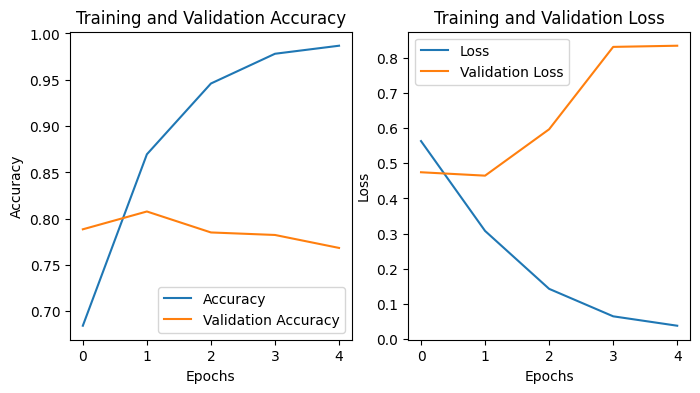

In [ ]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()
